In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('ad.csv')

In [5]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Выведем результат суммы кликов по группам А и В

In [9]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)

In [10]:
summary_df

,action
ad_id,
A,304
B,372


Рассчитаем количество элементов по каждой группе и коэффициент конверсии.

In [11]:
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id')

In [12]:
summary_df

,action,total_count,conversion_rate
ad_id,,,
A,304,1000,0.304
B,372,1000,0.372


In [ ]:
Вычислим стандартное отклонение и стандартную ошибку среднего значения

In [14]:
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))

In [15]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Промежуточный вывод: коэффиц.конверсии рекламы В выше, чем у рекламы А.

Text(0, 0.5, 'Коэффициент конверсии')

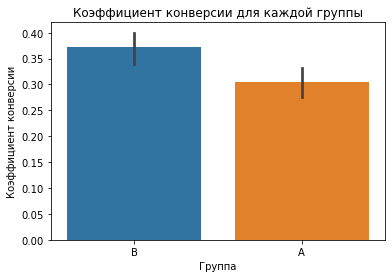

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэффициент конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэффициент конверсии')

Гипотеза: Hо: коэффициент конверсии объявления А равен коэффициенту конверсии объявления В

          Н1: коэффициент конверсии объявления А не равен коэффициенту конверсии объявления В

          α = 0,05

Проверим гипотезу.
Используем критерий Z-статистики для конверсии.

In [28]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [32]:
group_A_results = df[df['ad_id'] == 'A']['action']
group_B_results = df[df['ad_id'] == 'B']['action']

Посчитаем p-value.

In [33]:
nobs = [group_A_results.count(), group_B_results.count()]
successes = [group_A_results.sum(), group_B_results.sum()]
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [34]:
alpha = 0.05
print(pval < alpha)

True


Вывод: т.к. p-value меньше порога ошибки первого рода, отклоняем нулевую гипотезу, результат эксперимента можно считать статзначимым.